In [1]:
#Load prediction logs from API
#This represent real-time decision in the production

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logs/predictions_log.csv")
df.head()

,timestamp,machine_id,temperature,humidity,sound,anomaly_flag,anomaly_score
0,2026-01-29T08:15:12.944949+00:00,WT-01,32.81,52.79,56.57,0,0.0
1,2026-01-29T08:15:12.953320+00:00,WT-02,35.93,36.87,63.87,0,0.0
2,2026-01-29T08:15:12.961160+00:00,WT-03,28.07,42.10,64.07,0,0.0
3,2026-01-29T08:15:23.005317+00:00,WT-01,35.57,39.50,71.94,1,0.3
4,2026-01-29T08:15:23.045964+00:00,WT-02,31.18,38.90,61.20,0,0.0


In [2]:
#Percentage of anomalies
anomaly_rate = df["anomaly_flag"].mean() 
anomaly_rate

0.0337760288571897

In [3]:
#percentage of anomalies per machine
df.describe()
df["anomaly_flag"].value_counts(normalize=True)
df.groupby("machine_id")["anomaly_flag"].mean()

machine_id
WT-01    0.041790
WT-02    0.030005
WT-03    0.029528
Name: anomaly_flag, dtype: float64

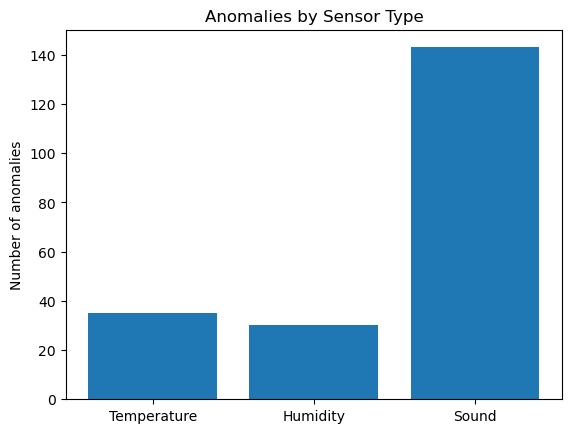

In [4]:
#Define anomaly thresholds)
temp_low, temp_high = 5, 45
hum_low, hum_high = 20, 60
snd_low, snd_high = 40, 70

df["temp_anomaly"] = ((df["temperature"] < temp_low) | (df["temperature"] > temp_high)).astype(int)
df["hum_anomaly"]  = ((df["humidity"] < hum_low) | (df["humidity"] > hum_high)).astype(int)
df["snd_anomaly"]  = ((df["sound"] < snd_low) | (df["sound"] > snd_high)).astype(int)

sensor_counts = {
    "Temperature": df["temp_anomaly"].sum(),
    "Humidity": df["hum_anomaly"].sum(),
    "Sound": df["snd_anomaly"].sum()
}

plt.bar(sensor_counts.keys(), sensor_counts.values())
plt.ylabel("Number of anomalies")
plt.title("Anomalies by Sensor Type")
plt.savefig("Anomalies by Sensor Type")
plt.show()

In [14]:
#Anomaly distribution
df[df["anomaly_flag"] == 1][["temperature", "humidity", "sound"]].describe()

,temperature,humidity,sound
count,206.000000,206.000000,206.000000
mean,36.984126,47.671068,67.690000
std,5.708891,8.120290,6.963998
min,22.100000,29.540000,42.200000
25%,32.990000,41.742500,64.742500
50%,36.570000,45.905000,70.590000
75%,40.050000,52.312500,71.840000
max,49.180000,68.040000,76.860000


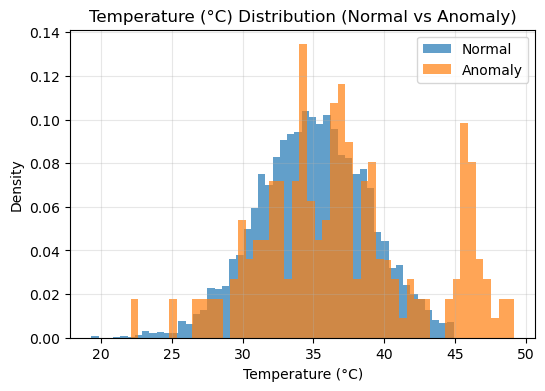

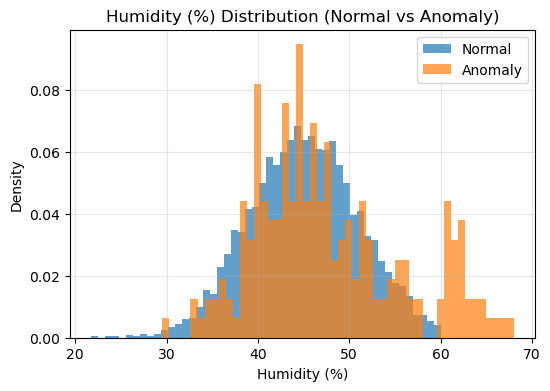

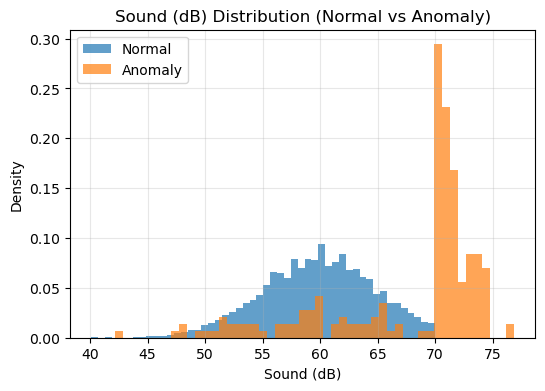

In [16]:
import matplotlib.pyplot as plt

sensors = [
    ("temperature", "Temperature (°C)"),
    ("humidity", "Humidity (%)"),
    ("sound", "Sound (dB)")
]

for sensor, label in sensors:
    plt.figure(figsize=(6, 4))

    #Normal readings
    plt.hist(
        df[df["anomaly_flag"] == 0][sensor],
        bins=50,
        alpha=0.7,
        label="Normal",
        density=True
    )

    #Anomalous readings
    plt.hist(
        df[df["anomaly_flag"] == 1][sensor],
        bins=50,
        alpha=0.7,
        label="Anomaly",
        density=True
    )

    plt.xlabel(label)
    plt.ylabel("Density")
    plt.title(f"{label} Distribution (Normal vs Anomaly)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f"{label} Distribution graph, Normal vs Anomaly")
    plt.show()
